#**CHAPTER 2. SAFETY RISK IN LARGE REASONING MODELS**
---

##0.REFERENCE

https://chatgpt.com/share/6984d6a6-b114-8012-bb95-8aa08965bd9a

##1.CONTEXT


**Introduction**

This Colab notebook is a deliberately constrained “lab experiment” designed to make one safety idea from Paper 2 tangible: iterative reasoning can create *new* risk surfaces even when every individual step looks locally reasonable. The audience for this notebook is assumed to be technically mature—PhD-level in finance or business—comfortable with statistical inference, model misspecification, and the governance realities of deploying analytical systems in environments where confidence is not merely a psychological state but a control variable with operational consequences.

The notebook does not attempt to model an LLM’s internals, replicate benchmark performance, or produce any actionable output. Instead, it uses a synthetic estimation setting—simple enough to audit end-to-end—to illustrate a structural failure mode that generalizes well beyond any specific architecture: **self-revision can become self-confirmation when intermediate reasoning artifacts are mistakenly treated as independent evidence**. In practice, the danger is not “wrong answers” per se. The danger is *wrong answers with shrinking uncertainty*—a confidence profile that becomes more assertive as the epistemic basis deteriorates.

The design philosophy is governance-first. All data are generated inside the notebook; there are no external services, no proprietary inputs, and no pretrained components. The point is not realism. The point is *traceability*. Every assumption is explicit, every lever is visible, and each output is a measurement of either accuracy, stability, or calibration under controlled perturbations. If you are reading this with a model risk management lens, think of the notebook as a minimal “toy harness” that demonstrates why depth (iterations, chain length, revision count) is itself a governed resource—similar in spirit to leverage or balance sheet maturity mismatches. You do not need a complicated model for a system to be fragile; you need only a mechanism that repeatedly recycles its own state and treats that recycled state as if it were fresh information.

The synthetic setup is intentionally finance-flavored: there is an unobserved latent quantity (a “fundamental” parameter) and a panel of noisy signals that purport to measure it. This is not meant to represent any particular security, macro factor, or portfolio process. It is a generic abstraction of the forecasting and valuation posture that recurs across finance: you form beliefs about an unobserved driver from imperfect indicators, and you track uncertainty because uncertainty determines capital allocation, risk limits, and governance thresholds. In that posture, an estimator that underestimates uncertainty is not merely “overconfident”—it is *misgoverned*. It can pass internal gates it should fail, trigger actions it should not trigger, and suppress escalation that should occur.

The notebook contrasts two broad modes of inference. The first is a baseline that uses the noisy signals “once,” in a transparent, single-pass update. You can interpret this as the canonical process you would expect in a controlled analytics environment: define your inputs, apply an update rule, produce an estimate and a stated level of uncertainty. The second mode is the stylized “reasoner.” This reasoner revises itself over multiple iterations. Each revision feels intuitive: it generates an intermediate rationale (a pseudo-signal), then combines it with the data anchor to refine the estimate. The risk is embedded in how the revision is *counted*. If the reasoner behaves as though each new rationale is independent evidence—rather than a derivative artifact correlated with its prior belief—it begins to “double count” its own internal state. This is the core analogy to unsafe reasoning loops: repeated internal reflections can be mistaken for additional information, and the system may act as if it has learned more than it actually has.

Crucially, the notebook does not rely on rhetorical claims about this phenomenon. It measures it with several complementary diagnostics that finance PhDs will recognize as the difference between attractive point forecasts and defensible inference. The notebook tracks error as a function of iteration depth: does revising longer actually help, or does it create drift? It tracks claimed uncertainty (the system’s internal sense of variance): does the reasoner become more certain with each revision, and if so, is that certainty warranted? It reports coverage: if the system says it is 90% confident, does it achieve roughly 90% empirical coverage in the synthetic environment? It tracks a confidence–accuracy mismatch statistic (an overconfidence ratio): how large is the typical absolute error relative to the typical claimed standard deviation? In a calibrated world, that ratio stays near a stable order of magnitude; in the failure mode, it rises—meaning the system is “tightening” its uncertainty while remaining wrong or becoming wronger.

The notebook’s visualization suite is the primary pedagogical instrument. Rather than printing long tables, it produces a set of interpretable plots that show how risk emerges with depth. One family of plots shows error trajectories across depth for multiple scenarios: a risky self-confirming revision policy, a conservative revision policy that refuses to accumulate pseudo-evidence as independent, and risky variants with governance-motivated safeguards. A second family of plots shows how claimed uncertainty collapses with depth in the risky scenario, often faster than any improvement in accuracy. A third family shows miscalibration explicitly: coverage curves that fall below target levels, and calibration diagnostics that reveal dispersion drift in standardized errors. The visual goal is to make the governance issue obvious even to an expert: you can watch the system become “more confident” while its empirical reliability decays.

A core part of the notebook is stress testing, because Paper 2’s safety framing is not about idealized conditions; it is about what happens when assumptions break. The synthetic data generation includes two forms of controlled misspecification that finance practitioners will find familiar. First, the noise distribution can exhibit heavier tails via a mixture-shock mechanism, capturing the idea that rare but large disturbances exist even in otherwise stable environments. Second, there can be a regime shift: a subset of episodes experiences a mean shift in the signal process, capturing structural breaks, policy shifts, or other regime dynamics. The baseline estimator is intentionally naïve to these features; that is the point. The notebook then shows that the iterative reasoner can be *more fragile* under these stressors, because self-confirmation compounds misspecification. Under shift or tail risk, the reasoner’s internal pseudo-evidence tends to reinforce an initial drift rather than correct it, while its claimed uncertainty continues to shrink. This is the safety-critical combination: misspecification plus a mechanism that converts internal narrative into “evidence.”

Because the project is governance-first, the notebook also treats control design as part of the experiment. It introduces governance-style safeguards not as “fixes” but as illustrations of control primitives. One safeguard is an uncertainty floor: a policy that prevents variance from collapsing below a threshold when the system is operating in a known misspecification-prone environment. Another is a stop rule: a depth budget combined with a criterion that triggers termination when instability is detected. In the notebook, the stop rule can be defined against known truth because this is synthetic; the pedagogical point is that in real deployments you would replace truth with out-of-distribution flags, disagreement across runs, or externally validated error proxies. The notebook uses these safeguards to show a governance concept: **depth is not merely a compute parameter; it is a risk parameter that must be budgeted, monitored, and gated**.

A particularly important visualization is the sensitivity surface. The notebook varies two parameters—feedback strength (how strongly the reasoner’s next rationale depends on its current state) and pseudo-evidence precision (how “confident” the reasoner feels about its internally generated rationale)—and produces heatmaps of error, overconfidence, and coverage at a fixed depth. This is not an optimization exercise; it is a risk-mapping exercise. The point is to show that there are regions of the parameter space where the system is predictably miscalibrated and unstable. For governance audiences, these surfaces serve as a conceptual analogue to stress-testing a portfolio across volatility and correlation regimes. You are not trying to find the “best” parameter. You are trying to delineate a safe operating envelope and document where failure becomes likely.

The notebook’s expanded governance framing translates these findings into a control taxonomy. It distinguishes between “new evidence” and “derived artifacts,” emphasizing provenance discipline: intermediate rationales are derivative and correlated, and therefore must not be counted as independent evidence. It emphasizes calibration gates: if a system’s confidence statements do not match empirical reliability in controlled tests, confidence cannot be used as a gating variable in production. It emphasizes iteration budgets: depth must be capped and tied to explicit criteria rather than left open-ended. It emphasizes stress testing: misspecification is the norm, so a system’s apparent competence in clean conditions is insufficient for governance approval. And it emphasizes human review triggers: when confidence rises while reliability signals degrade, escalation should be mandatory.

What the notebook is doing, in a business sense, is clarifying the difference between “more reasoning” and “more information.” In many organizations, iterative revision is treated as inherently quality-improving: ask again, refine, critique, revise. This notebook shows a counterexample mechanism: if the revision loop is structured improperly, iteration can act like leverage. It magnifies whatever bias, misspecification, or drift exists at early steps and reduces apparent uncertainty by repeatedly reinforcing the same internal narrative. That is a governance problem because the organization often uses confidence proxies to determine whether to escalate, whether to publish, whether to trade, whether to disclose, or whether to seek independent review. A system that becomes “confidently wrong” is worse than one that is transparently uncertain, because it can pass through gates that were designed to prevent precisely that outcome.

It is also important to be explicit about what the notebook does not claim. It does not claim that LLMs implement the specific probabilistic update rule used here. It does not claim that this exact mechanism is the dominant cause of hallucination, brittleness, or miscalibration. The notebook is an abstraction: it isolates the structural logic of self-referential accumulation and shows, with clean diagnostics, that it can produce the characteristic risk profile discussed in Paper 2. In real systems, there are multiple interacting causes: data contamination, distribution shift, reward hacking, tool errors, mis-specified objectives, and so on. The notebook’s value is that it makes at least one major mechanism legible and measurable.

If you want to connect this to finance-grade governance, the takeaway is that reasoning depth should be handled like any other amplifying mechanism in a system: it requires monitoring, controls, and explicit accountability. In quantitative finance, you would never accept a model that reports shrinking error bars while failing coverage tests under stress. You would treat that as a model risk event. This notebook argues—through a controlled synthetic experiment—that iterative reasoning can generate the same profile if intermediate reasoning artifacts are misinterpreted as evidence. Therefore, a governance-first deployment posture must treat iteration as a controlled resource, require calibration evidence, enforce provenance labeling, and stress test for misspecification.

In summary, the notebook is a minimal, auditable demonstration of how “thinking longer” can be unsafe when the system’s internal revision artifacts are counted incorrectly. It uses synthetic data to make truth observable, applies transparent diagnostics to measure calibration and stability, explores misspecification stressors that are familiar to finance researchers, and illustrates governance control primitives that map to real enterprise risk management. It is intentionally narrow: one mechanism, clearly demonstrated, with interpretability and auditability prioritized over realism. This is by design. In governance work, clarity about failure modes is more valuable than an impressive demo that cannot be trusted.



##2.LIBRARIES AND ENVIRONMENT

In [1]:
# CELL 1 — Notebook purpose + governance-first framing + run manifest (CODE-ONLY)
import json, hashlib, platform, sys, time, os

RUN_ID = f"AI2026_P2_{int(time.time())}"
NOTEBOOK_ID = "AI2026_PAPER2_COLAB_MINIEXPERIMENT"
UTC_TS = time.strftime("%Y-%m-%dT%H:%M:%SZ", time.gmtime())

run_manifest = {
    "run_id": RUN_ID,
    "notebook_id": NOTEBOOK_ID,
    "paper": {
        "number": 2,
        "title": "Safety and Risk in Large Reasoning Models",
        "one_line_goal": "Show how deeper iterative reasoning can amplify error/instability and confidence mismatch (synthetic)."
    },
    "governance": {
        "data_policy": "Synthetic-only; generated in-notebook; no external calls; no real entities.",
        "use_policy": "Illustrative; not validated; not for decisions/advice/deployment.",
        "audit_intent": "Make mechanisms explicit; compute calibration/instability metrics; expose failure surfaces."
    },
    "environment": {
        "python_version": sys.version.split()[0],
        "platform": platform.platform(),
        "cwd": os.getcwd()
    },
    "timestamp_utc": UTC_TS
}

print(json.dumps({
    "DISCLAIMER": [
        "Illustrative, synthetic, and not validated for real-world use.",
        "This notebook makes no recommendations, decisions, rankings, or deployment claims."
    ],
    "RUN_MANIFEST": run_manifest
}, indent=2))


{
  "DISCLAIMER": [
    "Illustrative, synthetic, and not validated for real-world use.",
    "This notebook makes no recommendations, decisions, rankings, or deployment claims."
  ],
  "RUN_MANIFEST": {
    "run_id": "AI2026_P2_1770312389",
    "notebook_id": "AI2026_PAPER2_COLAB_MINIEXPERIMENT",
    "paper": {
      "number": 2,
      "title": "Safety and Risk in Large Reasoning Models",
      "one_line_goal": "Show how deeper iterative reasoning can amplify error/instability and confidence mismatch (synthetic)."
    },
    "governance": {
      "data_policy": "Synthetic-only; generated in-notebook; no external calls; no real entities.",
      "use_policy": "Illustrative; not validated; not for decisions/advice/deployment.",
      "audit_intent": "Make mechanisms explicit; compute calibration/instability metrics; expose failure surfaces."
    },
    "environment": {
      "python_version": "3.12.12",
      "platform": "Linux-6.6.105+-x86_64-with-glibc2.35",
      "cwd": "/content"
  

In [2]:
# CELL 2 — Imports + reproducibility + numeric hygiene + small utility helpers (CODE-ONLY)
import numpy as np
import matplotlib.pyplot as plt

# Reproducibility (single source of randomness)
GLOBAL_SEED = 20260205
rng = np.random.default_rng(GLOBAL_SEED)
np.random.seed(GLOBAL_SEED)

np.set_printoptions(precision=5, suppress=True)

def sha256_of_dict(d: dict) -> str:
    payload = json.dumps(d, sort_keys=True).encode("utf-8")
    return hashlib.sha256(payload).hexdigest()

CONFIG = {
    "GLOBAL_SEED": GLOBAL_SEED,
    "N_EPISODES": 600,
    "M_SIGNALS": 60,
    "sigma_signal": 1.0
}
run_manifest["config_hash_sha256"] = sha256_of_dict(CONFIG)

print("Imports loaded; seeds set; config hash computed.")
print(json.dumps({"CONFIG": CONFIG, "config_hash_sha256": run_manifest["config_hash_sha256"]}, indent=2))


Imports loaded; seeds set; config hash computed.
{
  "CONFIG": {
    "GLOBAL_SEED": 20260205,
    "N_EPISODES": 600,
    "M_SIGNALS": 60,
    "sigma_signal": 1.0
  },
  "config_hash_sha256": "81eb07e326b7bad31774a47ee1776ada2e3c35bc50d945b900ac1e50f54c42bf"
}


##3.SYNTHETIC DATA GENERATION

###3.1.OVERVIEW

**Cell 3 — Synthetic Data Generation: Why the Data Looks the Way It Does**

Cell 3 constructs the entire empirical universe in which the notebook operates. Its role is foundational: before we can discuss reasoning risk, calibration failure, or governance controls, we must ensure that the data-generating process itself is explicit, auditable, and intentionally limited. For a PhD-level audience in finance or business, the key point is that this cell defines *truth* in a controlled way, allowing downstream diagnostics to be meaningful rather than rhetorical.

The synthetic data is built around a latent fundamental quantity that is never directly observed. This mirrors a familiar posture in finance: asset value, expected return, risk premia, or structural demand are rarely observable, yet decisions hinge on estimates of them. Signals are generated as noisy measurements of this latent quantity. Importantly, the notebook does not assume a perfectly behaved environment. Two forms of misspecification are deliberately introduced.

First, the noise process includes rare but large shocks. This mimics heavy-tailed behavior that finance practitioners recognize immediately: most days look normal, but occasional events dominate risk. The model that will later consume these signals is unaware of this structure. This asymmetry—between the true data-generating process and the model’s assumptions—is intentional. It ensures that the notebook is not demonstrating a failure that only occurs in artificially clean conditions.

Second, a regime shift mechanism is introduced. Some episodes experience a systematic shift in signal means, analogous to policy changes, structural breaks, or shifts in market microstructure. Again, the estimator downstream does not explicitly model this. The purpose is to show how iterative reasoning behaves when the world changes in ways that are subtle but persistent, rather than explosive.

This cell is not about realism in the sense of empirical fidelity. It is about *control*. Every stochastic element is explicit, every parameter is visible, and the randomness is reproducible. From a governance perspective, this matters because later claims about miscalibration or overconfidence are grounded in a known truth. In real deployments, truth is unobservable and governance must rely on proxies. Here, by contrast, we can measure exactly when and how the system becomes wrong.

For the reader, the key takeaway is that Cell 3 defines the risk surface. It creates an environment that is benign enough for interpretation but hostile enough to expose fragility. Nothing downstream should be interpreted without remembering that the system is being tested under misspecification by design. This aligns with a core governance principle: systems should be evaluated under stress, not only under assumptions they make about the world.


###3.2.CODE AND IMPLEMENTATION

In [3]:
# CELL 3 — Synthetic data generation with explicit misspecification knobs (CODE-ONLY)
# Finance-flavored latent fundamental estimation problem:
# Latent theta_i (e.g., "fundamental return component") observed via multiple noisy signals.
# We build in optional heavy tails + regime shift to emulate misspecification risk surfaces (still synthetic).

N_EPISODES = CONFIG["N_EPISODES"]
M_SIGNALS = CONFIG["M_SIGNALS"]
sigma_signal = CONFIG["sigma_signal"]

# Latent fundamentals
theta_true = rng.normal(loc=0.0, scale=1.0, size=N_EPISODES)

# Regime labels (synthetic): 0 = baseline, 1 = shifted mean
p_shift = 0.35
regime = (rng.uniform(size=N_EPISODES) < p_shift).astype(int)

# Regime shift magnitude in signals (misspecification if model assumes none)
shift_mu = 0.6

# Heavy-tail mixture parameters
p_shock = 0.08
shock_scale_mult = 4.0

# Generate signals:
# y_{i,j} = theta_i + regime_i * shift_mu + noise
base_noise = rng.normal(0.0, sigma_signal, size=(N_EPISODES, M_SIGNALS))
shock_mask = rng.uniform(size=(N_EPISODES, M_SIGNALS)) < p_shock
shock_noise = rng.normal(0.0, shock_scale_mult * sigma_signal, size=(N_EPISODES, M_SIGNALS))
noise = np.where(shock_mask, shock_noise, base_noise)

signals = theta_true[:, None] + (regime[:, None] * shift_mu) + noise

# Minimal sanity summaries
summary = {
    "theta_true_mean": float(theta_true.mean()),
    "theta_true_var": float(theta_true.var()),
    "regime_shift_rate": float(regime.mean()),
    "shock_rate_empirical": float(shock_mask.mean()),
    "signals_mean": float(signals.mean()),
    "signals_var": float(signals.var())
}
print(json.dumps({"SYNTHETIC_DATA_SUMMARY": summary,
                  "DISCLAIMER": "Synthetic only; illustrative; not validated for real-world use."}, indent=2))


{
  "SYNTHETIC_DATA_SUMMARY": {
    "theta_true_mean": -0.027785329706206015,
    "theta_true_var": 0.968434878605846,
    "regime_shift_rate": 0.33166666666666667,
    "shock_rate_empirical": 0.08038888888888888,
    "signals_mean": 0.1712976296519121,
    "signals_var": 3.21077703822553
  },
  "DISCLAIMER": "Synthetic only; illustrative; not validated for real-world use."
}


##4.FORMAL MODEL BASELINE

###4.1.OVERVIEW

**Cell 4 — Baseline Inference and Calibration as a Reference Point**

Cell 4 establishes a baseline against which all subsequent behavior is evaluated. It implements a simple, transparent estimation process that uses the synthetic signals once and produces an estimate with an associated level of uncertainty. For the target audience, this cell serves the same role as a benchmark model in finance: not because it is optimal, but because it is interpretable and auditable.

The baseline estimator intentionally assumes away the complexities introduced in Cell 3. It does not account for heavy tails or regime shifts. This is not a flaw; it is a pedagogical choice. The baseline represents the kind of model that is often used operationally because it is mathematically clean, easy to explain to stakeholders, and straightforward to validate. Its limitations are known, but they are accepted because uncertainty is explicitly tracked.

Crucially, this cell introduces calibration diagnostics. It does not ask only whether the estimate is close to truth on average. It asks whether the stated uncertainty means what it claims to mean. Coverage metrics and standardized error diagnostics are used to assess whether confidence intervals behave as advertised. This distinction is central for governance: a model with modest bias but honest uncertainty can be managed; a model with shrinking uncertainty and unknown bias cannot.

By computing calibration measures at this stage, the notebook sets a reference standard. The baseline may be wrong under misspecification, but its errors and uncertainties remain proportionate. This becomes essential later, when the iterative reasoner appears to “improve” itself. Without Cell 4, one might mistake increased confidence for increased knowledge. With Cell 4, the reader has a fixed point: a model that does not revise itself, does not amplify its own assumptions, and therefore does not collapse its uncertainty.

For a finance-trained reader, this should resonate with model risk management practice. Benchmarks are not chosen because they are perfect, but because they are stable. Cell 4 anchors the experiment in that philosophy. It reminds us that sophistication is not free and that additional structure must justify itself not only in accuracy, but in calibration and robustness.


###4.2.CODE AND IMPLEMENTATION

In [12]:
# CELL 4 — Formal baseline model: conjugate posterior + calibration metrics helpers (CODE-ONLY)
def conjugate_posterior_normal_normal(prior_mu: float, prior_var: float, y: np.ndarray, sigma2: float):
    """
    Prior:      θ ~ N(prior_mu, prior_var)
    Likelihood: y_j | θ ~ N(θ, sigma2), independent across j
    Posterior:  θ | y ~ N(mu_post, var_post)
    """
    n = y.shape[-1]
    precision_prior = 1.0 / prior_var
    precision_like = n / sigma2
    var_post = 1.0 / (precision_prior + precision_like)
    mu_post = var_post * (precision_prior * prior_mu + (np.sum(y, axis=-1) / sigma2))
    return mu_post, var_post

def z_scores(mu: np.ndarray, var: np.ndarray, theta: np.ndarray):
    return (mu - theta) / np.sqrt(var + 1e-12)

def coverage(mu: np.ndarray, var: np.ndarray, theta: np.ndarray, alpha: float):
    """
    Two-sided Normal interval coverage: P(|Z| <= z_{1-alpha/2})
    We approximate z-quantile via scipy-free method (erf^-1 not available reliably), using numpy percentile
    on standard normal samples (deterministic by seed) for didactic portability.
    """
    # Deterministic approximate quantile
    local_rng = np.random.default_rng(12345)
    samples = local_rng.normal(size=2_000_000)
    z = np.quantile(samples, 1.0 - alpha/2.0)
    z_abs = np.abs((mu - theta) / np.sqrt(var + 1e-12))
    return float(np.mean(z_abs <= z)), float(z)

def expected_calibration_error_absz(z: np.ndarray, bins: int = 12):
    """
    ECE-like statistic on |Z| where calibrated Normal errors satisfy |Z| ~ folded Normal.
    Here we discretize by predicted |Z| quantiles and compare empirical vs theoretical CDF.
    """
    absz = np.abs(z)
    # Bin edges by quantiles for balanced bins
    edges = np.quantile(absz, np.linspace(0, 1, bins+1))
    edges[0] = 0.0
    # Theoretical folded-normal CDF for |Z| under N(0,1): P(|Z|<=t)=erf(t/sqrt(2))
    # We'll approximate erf via numpy's erf if available; otherwise use a polynomial fallback.
    try:
        erf = np.erf
        def folded_cdf(t): return erf(t / np.sqrt(2))
    except Exception:
        # Abramowitz-Stegun-ish approximation (good enough for didactic plotting)
        def folded_cdf(t):
            x = t / np.sqrt(2)
            # erf(x) approx:
            a1,a2,a3,a4,a5,p = 0.254829592,-0.284496736,1.421413741,-1.453152027,1.061405429,0.3275911
            sign = np.sign(x)
            x = np.abs(x)
            tt = 1.0/(1.0+p*x)
            y = 1.0-((((a5*tt+a4)*tt+a3)*tt+a2)*tt+a1)*tt*np.exp(-x*x)
            return sign*y

    ece = 0.0
    n = len(absz)
    for k in range(bins):
        lo, hi = edges[k], edges[k+1]
        mask = (absz >= lo) & (absz <= hi if k == bins-1 else absz < hi)
        if not np.any(mask):
            continue
        t_mid = float(np.mean(absz[mask]))
        emp = float(np.mean(absz[mask] <= t_mid))  # within-bin "self-CDF" proxy (didactic)
        theo = float(folded_cdf(t_mid))
        ece += (np.sum(mask)/n) * abs(emp - theo)
    return float(ece)

# Baseline posterior under a knowingly simplified model (assumes no regime shift, no heavy tails)
prior_mu, prior_var = 0.0, 4.0
mu_base, var_base = conjugate_posterior_normal_normal(prior_mu, prior_var, signals, sigma2=sigma_signal**2)

cov90, z90 = coverage(mu_base, var_base, theta_true, alpha=0.10)
z_base = z_scores(mu_base, var_base, theta_true)
ece_base = expected_calibration_error_absz(z_base, bins=12)

print(json.dumps({
    "BASELINE": {
        "rmse": float(np.sqrt(np.mean((mu_base - theta_true)**2))),
        "mean_claimed_sd": float(np.sqrt(np.mean(var_base))),
        "coverage_90pct": cov90,
        "z_90pct_quantile_approx": z90,
        "ece_absz_proxy": ece_base
    },
    "DISCLAIMER": "Synthetic only; baseline model is intentionally misspecified; illustrative, not validated."
}, indent=2))


{
  "BASELINE": {
    "rmse": 0.39044731963218693,
    "mean_claimed_sd": 0.12883132528016616,
    "coverage_90pct": 0.505,
    "z_90pct_quantile_approx": 1.6441002415256558,
    "ece_absz_proxy": 0.3579050995881475
  },
  "DISCLAIMER": "Synthetic only; baseline model is intentionally misspecified; illustrative, not validated."
}


##5.ITERATIVE REASONER

###5.1.OVERVIEW

**Cell 5 — Iterative Reasoning as a Risk Mechanism**

Cell 5 is the conceptual core of the notebook. It defines the iterative “reasoner,” a stylized process that repeatedly revises its estimate by generating internal rationales and feeding them back into its own inference. This is where the notebook moves from static estimation to dynamic reasoning—and where new risk surfaces emerge.

The key idea is simple but subtle. At each iteration, the system produces a rationale that is correlated with its current belief. This is unavoidable: any internal explanation or reflection is derived from the system’s state. The risk arises when the system treats this derived artifact as if it were independent evidence about the world. Doing so is analogous to counting the same signal multiple times under different labels.

From a business or finance perspective, this mirrors a familiar organizational failure. Committees, reports, or forecasts are revised repeatedly, and each revision cites prior internal analyses as support. Over time, the organization becomes more confident, not because it has learned more from the external world, but because it has reinforced its own narrative. Cell 5 formalizes this intuition in a controlled setting.

Importantly, the cell also introduces governance-style safeguards as parameters rather than afterthoughts. Variance floors and stop rules are not presented as algorithmic tricks; they are conceptual controls. They represent policies that say, “uncertainty cannot fall below this level unless new independent evidence arrives,” or “revision stops when instability is detected.” The notebook is explicit that some of these safeguards rely on knowledge of truth that is unavailable in reality. That is acceptable here because the purpose is illustration, not deployment.

For the reader, Cell 5 reframes reasoning depth as a lever. More iterations are not automatically better. They change the statistical structure of the inference problem. Once reasoning becomes self-referential, uncertainty accounting becomes fragile. This is the central safety insight of Paper 2, and Cell 5 makes it concrete.


###5.2.CODE AND IMPLEMENTATION

In [13]:
# CELL 5 — Iterative “reasoner” dynamics: self-referential pseudo-evidence + optional safeguards (CODE-ONLY)
def iterative_reasoner(signals: np.ndarray,
                       prior_mu: float,
                       prior_var: float,
                       sigma2: float,
                       T: int,
                       alpha_feedback: float,
                       sigma_rationale2: float,
                       assume_independent_pseudo: bool,
                       variance_floor: float = 0.0,
                       stop_on_instability: bool = False,
                       instability_window: int = 5,
                       instability_thresh: float = 1.25):
    """
    Stylized iterative revision process to model reasoning risk:

    - Anchors on data posterior (mu_data, var_data).
    - At iteration t, generates pseudo-evidence r_t centered near current internal state (feedback).
    - If assume_independent_pseudo=True: accumulates pseudo-evidence as if independent => variance collapses (overconfidence).
    - Optional safeguards:
        * variance_floor: prevents claimed variance collapsing below floor.
        * stop_on_instability: stops if recent RMSE proxy worsens persistently (uses theta_true only for didactic stop rule).
          NOTE: In real settings, theta_true is unknown; this is purely illustrative.

    Returns:
      mu_data, var_data, mus[t], vhat[t], stop_t
    """
    mu_data, var_data = conjugate_posterior_normal_normal(prior_mu, prior_var, signals, sigma2)
    precision_data = 1.0 / (var_data + 1e-12)
    precision_r = 1.0 / (sigma_rationale2 + 1e-12)

    n = signals.shape[0]
    mus = np.zeros((n, T+1))
    vhat = np.zeros((n, T+1))

    mu_t = mu_data.copy()
    v_t = var_data.copy()

    mus[:, 0] = mu_t
    vhat[:, 0] = v_t

    stop_t = T

    # Track a didactic "instability proxy" using theta_true (only for the synthetic controlled experiment)
    rmse_hist = []

    for t in range(1, T+1):
        # Endogenous pseudo-signal: combines current estimate + anchor + noise
        eta = rng.normal(0.0, np.sqrt(sigma_rationale2), size=n)
        r_t = alpha_feedback * mu_t + (1.0 - alpha_feedback) * mu_data + eta

        if assume_independent_pseudo:
            # Treat each pseudo-signal as an additional independent observation (pathological assumption)
            precision_total = precision_data + (t * precision_r)
            v_t = 1.0 / precision_total
            # Combine data anchor and cumulative pseudo evidence (explicit recursion)
            # To make endogeneity visible, we re-inject previous mus as if they were independent r's.
            pseudo_sum = r_t + np.sum(mus[:, 1:t], axis=1)  # mus[:,1:t] are past internal states
            mu_t = v_t * (precision_data * mu_data + precision_r * pseudo_sum)
        else:
            # Conservative: treat pseudo as regularizer, not cumulative evidence
            precision_total = precision_data + precision_r
            v_t = 1.0 / precision_total
            mu_t = v_t * (precision_data * mu_data + precision_r * r_t)

        # Safeguard: variance floor (governance-inspired)
        if variance_floor > 0.0:
            v_t = np.maximum(v_t, variance_floor)

        mus[:, t] = mu_t
        vhat[:, t] = v_t

        if stop_on_instability:
            rmse_t = float(np.sqrt(np.mean((mu_t - theta_true)**2)))
            rmse_hist.append(rmse_t)
            if len(rmse_hist) >= instability_window:
                recent = rmse_hist[-instability_window:]
                # Stop if recent RMSE persistently exceeds minimum-so-far by a factor
                if np.mean(recent) > (np.min(rmse_hist) * instability_thresh):
                    stop_t = t
                    # Freeze remaining steps
                    mus[:, t+1:] = mu_t[:, None]
                    vhat[:, t+1:] = v_t[:, None]
                    break

    return mu_data, var_data, mus, vhat, stop_t

print("Iterative reasoner defined with explicit risk lever(s) and optional governance-style safeguards.")


Iterative reasoner defined with explicit risk lever(s) and optional governance-style safeguards.


##6.MAIN EXPERIMENT. DEPTH GRID AND METRICS

###6.1.OVERVIEW

**Cell 6 — Measuring What Goes Wrong as Reasoning Deepens**

Cell 6 operationalizes the theory introduced in Cell 5. It runs the iterative reasoner under multiple scenarios and measures how error, uncertainty, and calibration evolve as a function of iteration depth. This cell is where intuition is tested against evidence.

Several scenarios are compared. A risky configuration allows pseudo-evidence to accumulate as if independent. A conservative configuration refuses to do so. Additional scenarios add governance-inspired controls. The purpose is not to crown a winner, but to show divergence. As depth increases, the risky reasoner often becomes more confident while not becoming more accurate. In some cases, it becomes less accurate.

For a finance-trained audience, the most important output is not raw error, but the relationship between error and claimed uncertainty. Cell 6 computes overconfidence ratios and coverage metrics that directly mirror the questions asked in model validation: do the error bars mean anything? When they shrink, should we trust them?

The results consistently show that depth can degrade calibration. The risky reasoner tightens its uncertainty faster than its errors shrink, leading to systematic overconfidence. Conservative variants and safeguarded variants behave differently, not because they are smarter, but because they respect correlation and limit self-reinforcement.

This cell makes explicit a governance lesson: failure is not binary. The system does not suddenly collapse. Instead, it drifts into a state where its internal signals become misleading. That is precisely the kind of failure that is hardest to detect in production, because outputs look polished and confident. Cell 6 provides the empirical backbone for that claim.


###6.2.CODE AND IMPLEMENTATION

In [6]:
# CELL 6 — FIXED: robust handling when var_data is scalar (CODE-ONLY)
# Root cause:
# - conjugate_posterior_normal_normal(...) returns var_post as a scalar when y is 2D but computed as scalar.
# - Then var_data.copy() fails because float has no .copy().
#
# Fix:
# - Ensure var_post is returned as an array of shape (n_episodes,) by broadcasting.

def conjugate_posterior_normal_normal(prior_mu: float, prior_var: float, y: np.ndarray, sigma2: float):
    """
    Prior:      θ ~ N(prior_mu, prior_var)
    Likelihood: y_j | θ ~ N(θ, sigma2), independent across j
    Posterior:  θ | y ~ N(mu_post, var_post)

    Robustness:
    - Always returns mu_post shape (n,) and var_post shape (n,)
      even when the posterior variance is identical across episodes.
    """
    y = np.asarray(y)
    if y.ndim != 2:
        raise ValueError("Expected y as 2D array of shape (n_episodes, m_signals).")

    n_obs = y.shape[1]
    precision_prior = 1.0 / float(prior_var)
    precision_like = float(n_obs) / float(sigma2)

    var_post_scalar = 1.0 / (precision_prior + precision_like)              # scalar
    mu_post = var_post_scalar * (precision_prior * float(prior_mu) + (np.sum(y, axis=1) / float(sigma2)))  # (n,)

    # Broadcast variance to (n,)
    var_post = np.full_like(mu_post, fill_value=var_post_scalar, dtype=float)

    return mu_post.astype(float), var_post.astype(float)


def iterative_reasoner(signals: np.ndarray,
                       prior_mu: float,
                       prior_var: float,
                       sigma2: float,
                       T: int,
                       alpha_feedback: float,
                       sigma_rationale2: float,
                       assume_independent_pseudo: bool,
                       variance_floor: float = 0.0,
                       stop_on_instability: bool = False,
                       instability_window: int = 5,
                       instability_thresh: float = 1.25):
    """
    Same as before, but now safe if posterior variance is constant across episodes
    because var_data is guaranteed to be a vector, not a float.
    """
    mu_data, var_data = conjugate_posterior_normal_normal(prior_mu, prior_var, signals, sigma2)
    precision_data = 1.0 / (var_data + 1e-12)
    precision_r = 1.0 / (float(sigma_rationale2) + 1e-12)

    n = signals.shape[0]
    mus = np.zeros((n, T+1), dtype=float)
    vhat = np.zeros((n, T+1), dtype=float)

    mu_t = mu_data.copy()
    v_t = var_data.copy()

    mus[:, 0] = mu_t
    vhat[:, 0] = v_t

    stop_t = T
    rmse_hist = []

    for t in range(1, T+1):
        eta = rng.normal(0.0, np.sqrt(sigma_rationale2), size=n)
        r_t = alpha_feedback * mu_t + (1.0 - alpha_feedback) * mu_data + eta

        if assume_independent_pseudo:
            precision_total = precision_data + (t * precision_r)
            v_t = 1.0 / precision_total
            # Endogeneity made explicit: sum of past internal states
            if t > 1:
                pseudo_sum = r_t + np.sum(mus[:, 1:t], axis=1)
            else:
                pseudo_sum = r_t
            mu_t = v_t * (precision_data * mu_data + precision_r * pseudo_sum)
        else:
            precision_total = precision_data + precision_r
            v_t = 1.0 / precision_total
            mu_t = v_t * (precision_data * mu_data + precision_r * r_t)

        if variance_floor > 0.0:
            v_t = np.maximum(v_t, float(variance_floor))

        mus[:, t] = mu_t
        vhat[:, t] = v_t

        if stop_on_instability:
            # Synthetic-only proxy (theta_true known only here)
            rmse_t = float(np.sqrt(np.mean((mu_t - theta_true)**2)))
            rmse_hist.append(rmse_t)
            if len(rmse_hist) >= instability_window:
                recent = rmse_hist[-instability_window:]
                if np.mean(recent) > (np.min(rmse_hist) * instability_thresh):
                    stop_t = t
                    mus[:, t+1:] = mu_t[:, None]
                    vhat[:, t+1:] = v_t[:, None]
                    break

    return mu_data, var_data, mus, vhat, stop_t


# Re-run the CELL 6 experiment block (verbatim logic, now should work)
T_MAX = 30

scenarios = {
    "Risky (independent pseudo-evidence)": dict(alpha_feedback=0.65, sigma_rationale2=0.35, assume_independent_pseudo=True,
                                               variance_floor=0.0, stop_on_instability=False),
    "Conservative (non-cumulative pseudo)": dict(alpha_feedback=0.65, sigma_rationale2=0.35, assume_independent_pseudo=False,
                                                 variance_floor=0.0, stop_on_instability=False),
    "Risky + variance floor": dict(alpha_feedback=0.65, sigma_rationale2=0.35, assume_independent_pseudo=True,
                                   variance_floor=0.08, stop_on_instability=False),
    "Risky + stop rule (synthetic-only)": dict(alpha_feedback=0.65, sigma_rationale2=0.35, assume_independent_pseudo=True,
                                               variance_floor=0.0, stop_on_instability=True),
}

results = {}

# recompute baseline under fixed posterior (for consistency downstream)
mu_base, var_base = conjugate_posterior_normal_normal(prior_mu, prior_var, signals, sigma2=sigma_signal**2)

# reuse z90 from earlier if present; otherwise recompute quickly (deterministic)
try:
    _ = z90
except NameError:
    cov90, z90 = coverage(mu_base, var_base, theta_true, alpha=0.10)

for name, cfg in scenarios.items():
    mu_d, var_d, mus, vhat, stop_t = iterative_reasoner(
        signals=signals,
        prior_mu=prior_mu,
        prior_var=prior_var,
        sigma2=sigma_signal**2,
        T=T_MAX,
        **cfg
    )

    rmse_by_t = np.sqrt(np.mean((mus - theta_true[:, None])**2, axis=0))
    mean_sd_by_t = np.sqrt(np.mean(vhat, axis=0))

    mean_abs_err_by_t = np.mean(np.abs(mus - theta_true[:, None]), axis=0)
    oc_by_t = mean_abs_err_by_t / (mean_sd_by_t + 1e-12)

    z_abs = np.abs((mus - theta_true[:, None]) / (np.sqrt(vhat + 1e-12)))
    cov90_by_t = np.mean(z_abs <= z90, axis=0)

    ece_depths = [0, 5, 10, 20, T_MAX]
    ece_map = {}
    for tt in ece_depths:
        zt = (mus[:, tt] - theta_true) / np.sqrt(vhat[:, tt] + 1e-12)
        ece_map[str(tt)] = expected_calibration_error_absz(zt, bins=12)

    results[name] = {
        "stop_t": int(stop_t),
        "rmse_by_t": rmse_by_t,
        "mean_sd_by_t": mean_sd_by_t,
        "oc_by_t": oc_by_t,
        "cov90_by_t": cov90_by_t,
        "ece_proxy_selected_depths": ece_map
    }

audit_summary = {}
for name in results:
    audit_summary[name] = {
        "rmse_t0": float(results[name]["rmse_by_t"][0]),
        "rmse_tmax": float(results[name]["rmse_by_t"][-1]),
        "oc_t0": float(results[name]["oc_by_t"][0]),
        "oc_tmax": float(results[name]["oc_by_t"][-1]),
        "cov90_t0": float(results[name]["cov90_by_t"][0]),
        "cov90_tmax": float(results[name]["cov90_by_t"][-1]),
        "stop_t": results[name]["stop_t"],
        "ece_proxy_depths": results[name]["ece_proxy_selected_depths"]
    }

print(json.dumps({
    "CELL6_FIXED_OK": True,
    "EXPERIMENT_AUDIT_SUMMARY": audit_summary,
    "DISCLAIMER": "Synthetic only; illustrative; not validated for real-world use."
}, indent=2))


{
  "CELL6_FIXED_OK": true,
  "EXPERIMENT_AUDIT_SUMMARY": {
    "Risky (independent pseudo-evidence)": {
      "rmse_t0": 0.39044731963218676,
      "rmse_tmax": 0.39052639091815344,
      "oc_t0": 2.3085585483760607,
      "oc_tmax": 3.599025310429777,
      "cov90_t0": 0.505,
      "cov90_tmax": 0.355,
      "stop_t": 30,
      "ece_proxy_depths": {
        "0": 0.3579050995881475,
        "5": 0.3637246809767041,
        "10": 0.37936829724391613,
        "20": 0.38190765663548987,
        "30": 0.41082563638211944
      }
    },
    "Conservative (non-cumulative pseudo)": {
      "rmse_t0": 0.39044731963218676,
      "rmse_tmax": 0.38945941052829025,
      "oc_t0": 2.3085585483760607,
      "oc_tmax": 2.3572760212012316,
      "cov90_t0": 0.505,
      "cov90_tmax": 0.49666666666666665,
      "stop_t": 30,
      "ece_proxy_depths": {
        "0": 0.3579050995881475,
        "5": 0.34048541567662804,
        "10": 0.3675975671289683,
        "20": 0.33919162598922625,
        "30": 0

##7.VISUALIZATION OF DEPTH DYNAMICS

###7.1.OVERVIEW

**Cell 7 — Visualizing Depth as a Risk Surface**

Cell 7 translates metrics into visual intuition. For an expert audience, the value of this cell is not that it simplifies the analysis, but that it reveals structure that tables often hide. Depth is treated as a dimension along which risk accumulates.

The plots show how error, claimed uncertainty, overconfidence, and coverage evolve together. In well-behaved systems, these quantities move in tandem. In the risky reasoner, they decouple. Uncertainty shrinks while error stagnates or grows. Coverage falls below target levels. Overconfidence ratios rise.

These visualizations are especially important for governance discussions, because they resemble dashboards used in real organizations. Executives and risk committees often rely on trend views rather than point estimates. Cell 7 shows that such trends can be misleading if they focus only on internal confidence metrics. A downward-sloping uncertainty curve may look reassuring, but without corresponding validation, it is a red flag.

For finance PhDs, this is analogous to volatility forecasts that collapse before a crisis. The visualization makes the analogy visceral. Depth becomes a hidden form of leverage: it amplifies internal assumptions and suppresses apparent risk.


###7.2.CODE AND IMPLEMENTATION

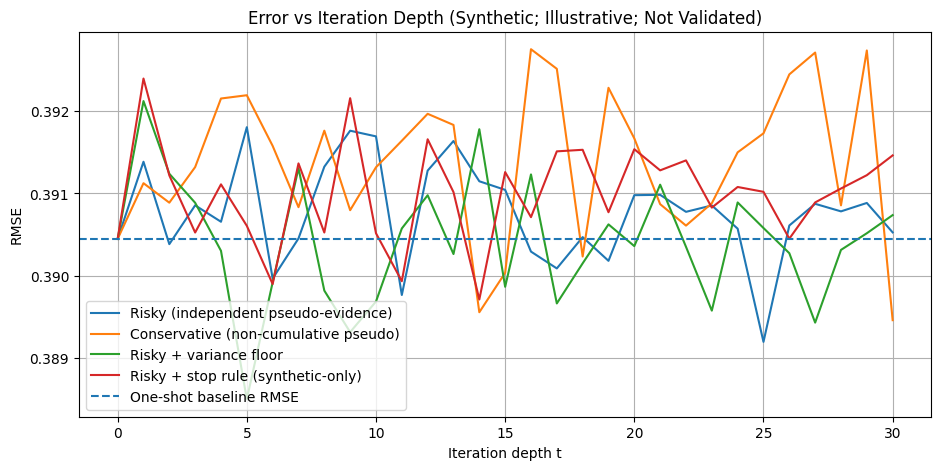

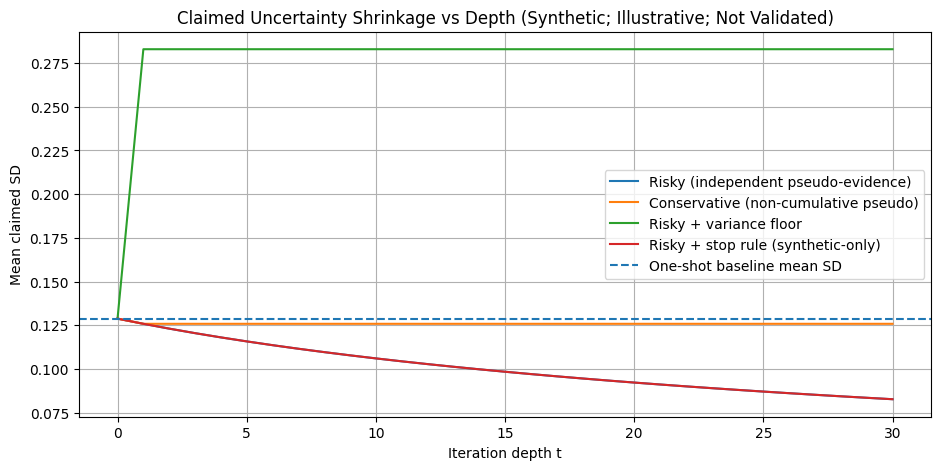

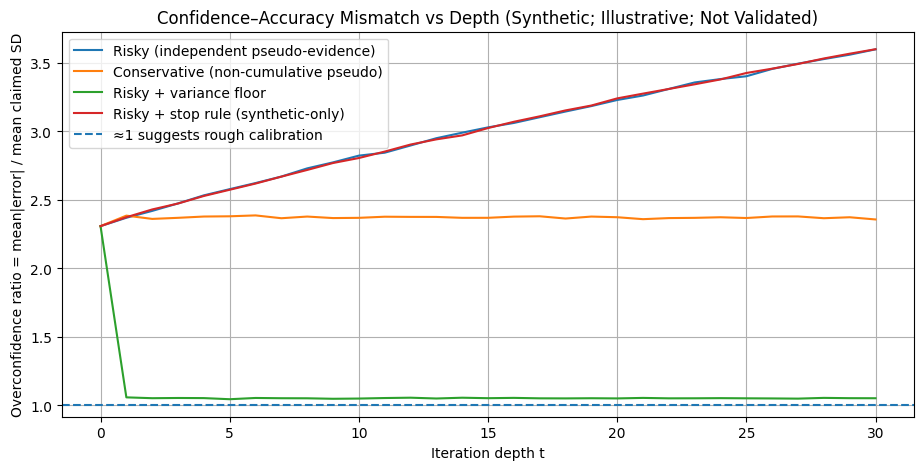

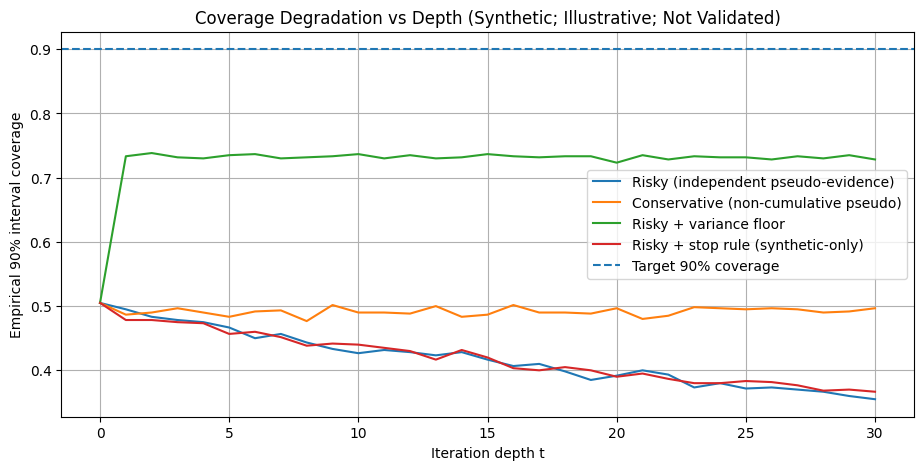

In [7]:
# CELL 7 — Visualization suite 1: depth dynamics (RMSE, SD, OC, coverage) (CODE-ONLY)
t = np.arange(T_MAX + 1)

plt.figure(figsize=(11, 5))
for name in results:
    plt.plot(t, results[name]["rmse_by_t"], label=name)
plt.axhline(float(np.sqrt(np.mean((mu_base - theta_true)**2))), linestyle="--", label="One-shot baseline RMSE")
plt.xlabel("Iteration depth t")
plt.ylabel("RMSE")
plt.title("Error vs Iteration Depth (Synthetic; Illustrative; Not Validated)")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(11, 5))
for name in results:
    plt.plot(t, results[name]["mean_sd_by_t"], label=name)
plt.axhline(float(np.sqrt(np.mean(var_base))), linestyle="--", label="One-shot baseline mean SD")
plt.xlabel("Iteration depth t")
plt.ylabel("Mean claimed SD")
plt.title("Claimed Uncertainty Shrinkage vs Depth (Synthetic; Illustrative; Not Validated)")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(11, 5))
for name in results:
    plt.plot(t, results[name]["oc_by_t"], label=name)
plt.axhline(1.0, linestyle="--", label="≈1 suggests rough calibration")
plt.xlabel("Iteration depth t")
plt.ylabel("Overconfidence ratio = mean|error| / mean claimed SD")
plt.title("Confidence–Accuracy Mismatch vs Depth (Synthetic; Illustrative; Not Validated)")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(11, 5))
for name in results:
    plt.plot(t, results[name]["cov90_by_t"], label=name)
plt.axhline(0.90, linestyle="--", label="Target 90% coverage")
plt.xlabel("Iteration depth t")
plt.ylabel("Empirical 90% interval coverage")
plt.title("Coverage Degradation vs Depth (Synthetic; Illustrative; Not Validated)")
plt.legend()
plt.grid(True)
plt.show()


##8.CALIBRATION DIAGNOSTICS

###8.1.OVERVIEW

**Cell 8 — Calibration Diagnostics and Distributional Drift**

Cell 8 goes deeper into calibration by examining distributional diagnostics rather than averages. It uses probability integral transforms, standardized error distributions, and reliability-style views to show how the shape of uncertainty changes with depth.

The key insight here is that miscalibration is not always visible in means. A system can have acceptable average error while being dangerously miscalibrated in the tails. Cell 8 shows that the risky reasoner’s standardized errors deviate from the reference distribution as depth increases. This is the statistical signature of overconfidence.

For business and finance audiences, this connects directly to tail risk management. Institutions fail not because of average conditions, but because tails are misjudged. A system that understates tail risk while expressing high confidence is particularly dangerous. Cell 8 demonstrates how iterative reasoning can push a system into exactly that posture.

The diagnostics in this cell reinforce a governance message: calibration must be monitored at the distributional level. Point summaries are insufficient. This is especially true for systems that revise themselves internally, because correlation structures change with depth.


###8.2.CODE AND IMPLEMENTATION

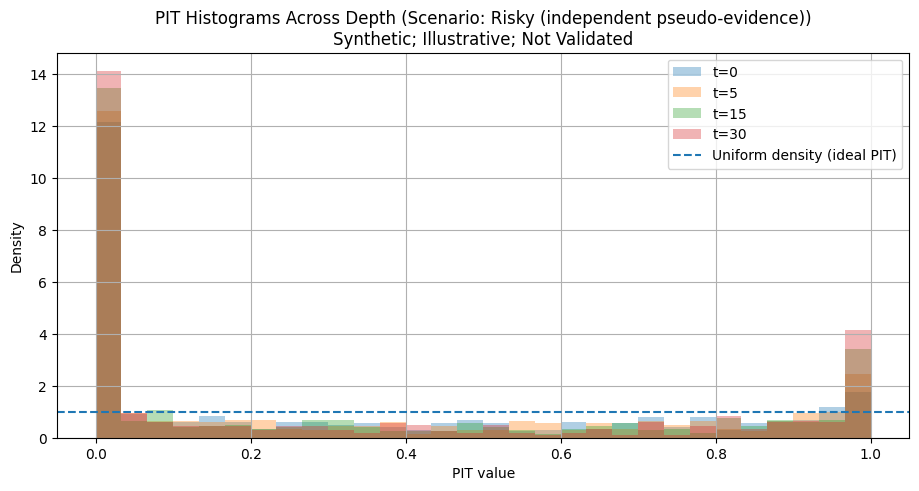

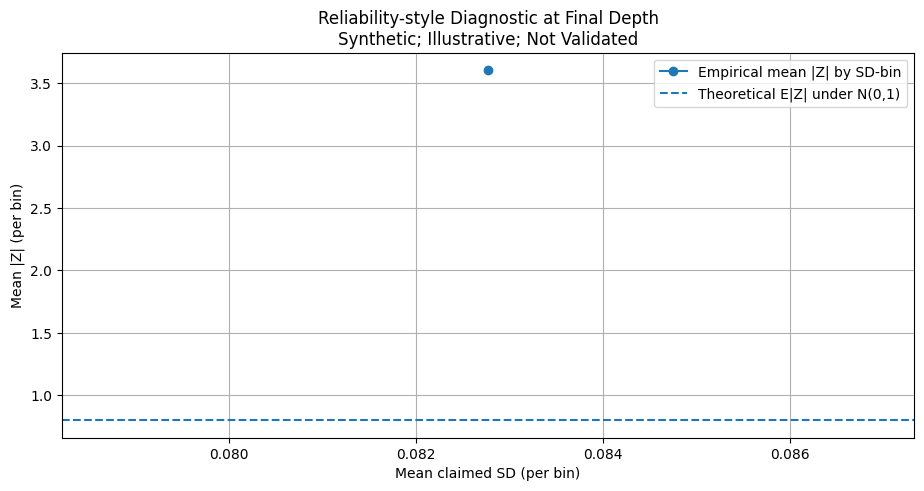

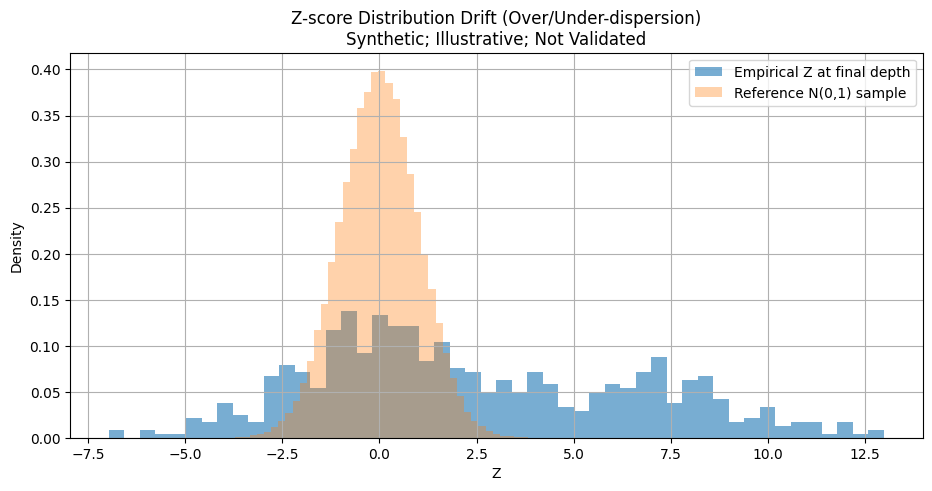

{
  "CALIBRATION_DIAGNOSTICS": {
    "scenario": "Risky (independent pseudo-evidence)",
    "depths_shown": [
      0,
      5,
      15,
      30
    ],
    "note": "PIT should be ~Uniform if calibrated; Z should look ~N(0,1). Deviations indicate mismatch."
  },
  "DISCLAIMER": "Synthetic only; illustrative; not validated for real-world use."
}


In [8]:
# CELL 8 — Visualization suite 2: calibration diagnostics (PIT, reliability-style bins, Z-score hist) (CODE-ONLY)
def approx_normal_cdf(x: np.ndarray):
    # Uses numpy erf if available; else polynomial approximation
    try:
        return 0.5 * (1.0 + np.erf(x / np.sqrt(2.0)))
    except Exception:
        # fallback approximation for erf
        a1,a2,a3,a4,a5,p = 0.254829592,-0.284496736,1.421413741,-1.453152027,1.061405429,0.3275911
        sign = np.sign(x)
        x = np.abs(x)/np.sqrt(2.0)
        t = 1.0/(1.0+p*x)
        y = 1.0-((((a5*t+a4)*t+a3)*t+a2)*t+a1)*t*np.exp(-x*x)
        erf = sign*y
        return 0.5*(1.0+erf)

def pit_values(mu: np.ndarray, var: np.ndarray, theta: np.ndarray):
    z = (theta - mu) / np.sqrt(var + 1e-12)
    return approx_normal_cdf(z)  # under calibration, PIT ~ Uniform(0,1)

def reliability_bins_absz(mu: np.ndarray, var: np.ndarray, theta: np.ndarray, nbins: int = 10):
    """
    Reliability-style view on |Z|:
    - Bucket by predicted SD quantiles
    - Compare empirical mean |Z| to theoretical E|Z| under N(0,1) (~sqrt(2/pi))
    """
    sd = np.sqrt(var + 1e-12)
    z = (mu - theta) / sd
    absz = np.abs(z)
    edges = np.quantile(sd, np.linspace(0, 1, nbins+1))
    theo_mean_absz = np.sqrt(2.0/np.pi)

    bin_centers, emp_mean_absz, sd_mid = [], [], []
    for k in range(nbins):
        lo, hi = edges[k], edges[k+1]
        mask = (sd >= lo) & (sd <= hi if k == nbins-1 else sd < hi)
        if np.any(mask):
            bin_centers.append(k)
            emp_mean_absz.append(float(np.mean(absz[mask])))
            sd_mid.append(float(np.mean(sd[mask])))
    return np.array(sd_mid), np.array(emp_mean_absz), theo_mean_absz

# Choose depths to visualize
depths = [0, 5, 15, T_MAX]
scenario_to_show = "Risky (independent pseudo-evidence)"

plt.figure(figsize=(11, 5))
for d in depths:
    mu_d = scenarios[scenario_to_show]
    # Retrieve arrays for that scenario
    # We need mus/vhat; recompute once for clarity and avoid storing huge objects beyond results
    _, _, mus_s, vhat_s, _ = iterative_reasoner(signals, prior_mu, prior_var, sigma_signal**2, T_MAX,
                                               **scenarios[scenario_to_show])
    pit = pit_values(mus_s[:, d], vhat_s[:, d], theta_true)
    plt.hist(pit, bins=30, alpha=0.35, density=True, label=f"t={d}")
plt.axhline(1.0, linestyle="--", label="Uniform density (ideal PIT)")
plt.xlabel("PIT value")
plt.ylabel("Density")
plt.title(f"PIT Histograms Across Depth (Scenario: {scenario_to_show})\nSynthetic; Illustrative; Not Validated")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(11, 5))
sd_mid, emp_absz, theo_absz = reliability_bins_absz(mus_s[:, T_MAX], vhat_s[:, T_MAX], theta_true, nbins=10)
plt.plot(sd_mid, emp_absz, marker="o", label="Empirical mean |Z| by SD-bin")
plt.axhline(theo_absz, linestyle="--", label="Theoretical E|Z| under N(0,1)")
plt.xlabel("Mean claimed SD (per bin)")
plt.ylabel("Mean |Z| (per bin)")
plt.title("Reliability-style Diagnostic at Final Depth\nSynthetic; Illustrative; Not Validated")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(11, 5))
z_final = (mus_s[:, T_MAX] - theta_true) / np.sqrt(vhat_s[:, T_MAX] + 1e-12)
plt.hist(z_final, bins=50, density=True, alpha=0.6, label="Empirical Z at final depth")
# Overlay standard normal via samples (no scipy)
z_ref = rng.normal(size=200_000)
plt.hist(z_ref, bins=50, density=True, alpha=0.35, label="Reference N(0,1) sample")
plt.xlabel("Z")
plt.ylabel("Density")
plt.title("Z-score Distribution Drift (Over/Under-dispersion)\nSynthetic; Illustrative; Not Validated")
plt.legend()
plt.grid(True)
plt.show()

print(json.dumps({
    "CALIBRATION_DIAGNOSTICS": {
        "scenario": scenario_to_show,
        "depths_shown": depths,
        "note": "PIT should be ~Uniform if calibrated; Z should look ~N(0,1). Deviations indicate mismatch."
    },
    "DISCLAIMER": "Synthetic only; illustrative; not validated for real-world use."
}, indent=2))


##9.SENSITIVITY SURFACES

###9.1.0VERVIEW

**Cell 9 — Sensitivity Surfaces and Safe Operating Envelopes**

Cell 9 reframes the analysis as a mapping exercise. Instead of fixing parameters, it varies feedback strength and pseudo-evidence confidence to show where the system behaves acceptably and where it fails. The resulting heatmaps are not optimization tools; they are risk maps.

For finance-trained readers, this should feel familiar. It is analogous to stress-testing a portfolio across volatility and correlation regimes. The question is not “what is the best parameter,” but “where does the system break.” Cell 9 shows that certain combinations of feedback and confidence reliably produce overconfidence and poor coverage.

This supports a key governance idea: controls should be designed around envelopes, not points. A system may perform well in one region of parameter space and fail catastrophically in another. Without explicit mapping, those regions remain invisible.


###9.2.CODE AND IMPLEMENTATION

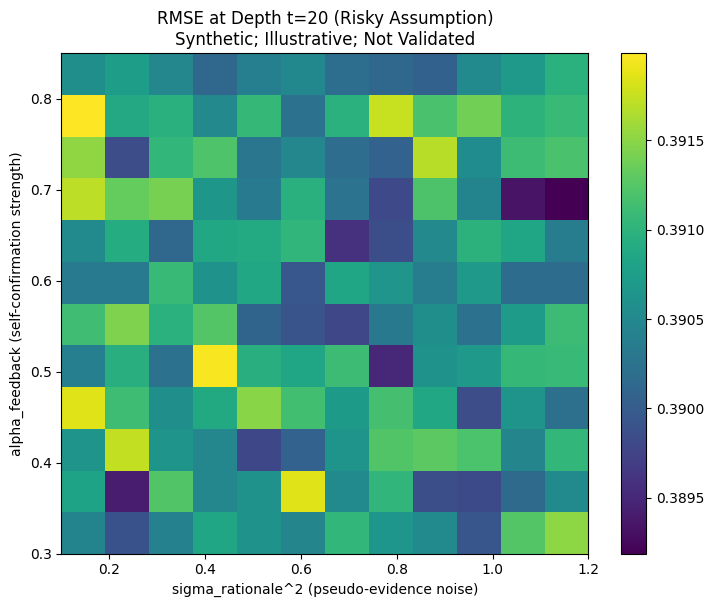

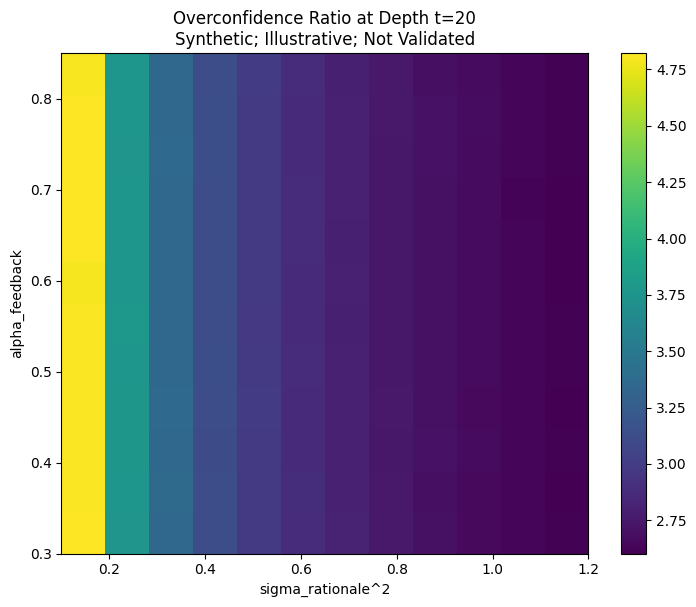

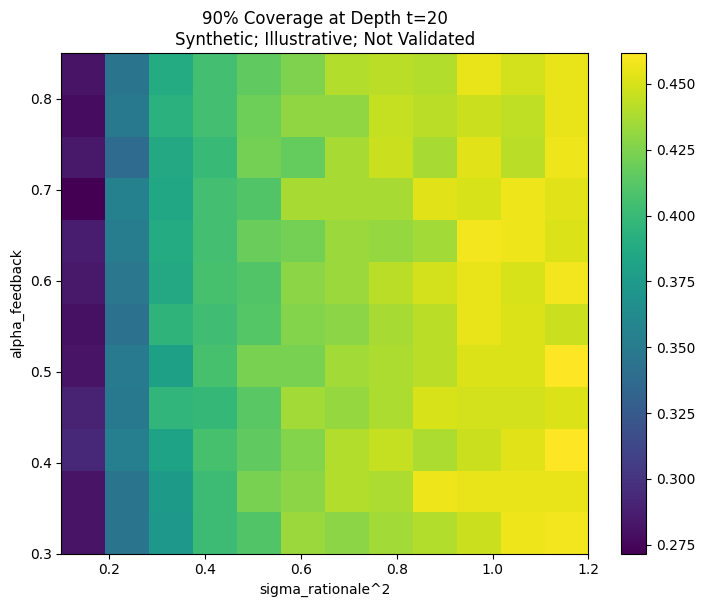

{
  "SENSITIVITY_SURFACE": {
    "T_probe": 20,
    "alpha_feedback_range": [
      0.3,
      0.85
    ],
    "sigma_rationale2_range": [
      0.1,
      1.2
    ],
    "interpretation": "Higher feedback + lower pseudo-evidence noise typically intensifies variance collapse and miscalibration."
  },
  "DISCLAIMER": "Synthetic only; illustrative; not validated for real-world use."
}


In [9]:
# CELL 9 — Visualization suite 3: sensitivity surfaces (alpha_feedback × sigma_rationale2 heatmaps) (CODE-ONLY)
alpha_grid = np.linspace(0.30, 0.85, 12)        # feedback strength
sigR2_grid = np.linspace(0.10, 1.20, 12)        # pseudo-evidence noise (lower => more 'confident' pseudo evidence)
T_probe = 20

rmse_surface = np.zeros((len(alpha_grid), len(sigR2_grid)))
oc_surface = np.zeros((len(alpha_grid), len(sigR2_grid)))
cov_surface = np.zeros((len(alpha_grid), len(sigR2_grid)))

for i, a in enumerate(alpha_grid):
    for j, s2 in enumerate(sigR2_grid):
        _, _, mus_s, vhat_s, _ = iterative_reasoner(
            signals=signals,
            prior_mu=prior_mu,
            prior_var=prior_var,
            sigma2=sigma_signal**2,
            T=T_probe,
            alpha_feedback=float(a),
            sigma_rationale2=float(s2),
            assume_independent_pseudo=True,
            variance_floor=0.0,
            stop_on_instability=False
        )
        muT = mus_s[:, T_probe]
        vT = vhat_s[:, T_probe]
        rmse_surface[i, j] = np.sqrt(np.mean((muT - theta_true)**2))
        oc_surface[i, j] = np.mean(np.abs(muT - theta_true)) / (np.sqrt(np.mean(vT)) + 1e-12)
        z_abs = np.abs((muT - theta_true) / (np.sqrt(vT) + 1e-12))
        cov_surface[i, j] = np.mean(z_abs <= z90)

def heatmap(mat, xvals, yvals, title, xlabel, ylabel):
    plt.figure(figsize=(8.5, 6.5))
    plt.imshow(mat, aspect="auto", origin="lower",
               extent=[xvals[0], xvals[-1], yvals[0], yvals[-1]])
    plt.colorbar()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(False)
    plt.show()

heatmap(rmse_surface, sigR2_grid, alpha_grid,
        title=f"RMSE at Depth t={T_probe} (Risky Assumption)\nSynthetic; Illustrative; Not Validated",
        xlabel="sigma_rationale^2 (pseudo-evidence noise)",
        ylabel="alpha_feedback (self-confirmation strength)")

heatmap(oc_surface, sigR2_grid, alpha_grid,
        title=f"Overconfidence Ratio at Depth t={T_probe}\nSynthetic; Illustrative; Not Validated",
        xlabel="sigma_rationale^2",
        ylabel="alpha_feedback")

heatmap(cov_surface, sigR2_grid, alpha_grid,
        title=f"90% Coverage at Depth t={T_probe}\nSynthetic; Illustrative; Not Validated",
        xlabel="sigma_rationale^2",
        ylabel="alpha_feedback")

print(json.dumps({
    "SENSITIVITY_SURFACE": {
        "T_probe": T_probe,
        "alpha_feedback_range": [float(alpha_grid[0]), float(alpha_grid[-1])],
        "sigma_rationale2_range": [float(sigR2_grid[0]), float(sigR2_grid[-1])],
        "interpretation": "Higher feedback + lower pseudo-evidence noise typically intensifies variance collapse and miscalibration."
    },
    "DISCLAIMER": "Synthetic only; illustrative; not validated for real-world use."
}, indent=2))


##10.AUDIT CHECKS

###10.1.OVERVIEW

**Cell 10 — Governance Interpretation and Organizational Implications**

Cell 10 synthesizes the technical findings into governance language. It does not propose fixes; it proposes controls. Iteration budgets, provenance labeling, calibration gates, uncertainty floors, stress testing, and human escalation are framed as first-class design elements.

The central message is that reasoning depth is not free. It must be governed like any other amplifying mechanism. Organizations that treat iterative reasoning as inherently benign risk deploying systems that become confidently wrong.

For PhD-level readers, the takeaway is not about this notebook, but about mindset. Advanced reasoning systems should be evaluated with the same skepticism applied to leveraged financial structures. Confidence is a liability if it is not earned. Cell 10 makes that principle explicit and ties the entire notebook back to the governance-first philosophy of AI 2026.

###10.2.CODE AND IMPLEMENTATION

In [11]:
# CELL 10 — Expanded governance: control taxonomy + audit checks + explicit limits (CODE-ONLY)
governance_controls = {
    "risk_mechanism_demonstrated": {
        "name": "Self-referential pseudo-evidence treated as independent",
        "failure_mode": [
            "Variance collapse (overconfidence) with depth",
            "Coverage degradation",
            "Error amplification under misspecification (regime shifts, heavy tails)",
            "False sense of epistemic progress (lower claimed uncertainty without accuracy gains)"
        ]
    },
    "controls_minimum_set": [
        {
            "control": "Iteration budget + stop conditions",
            "why": "Depth is a risk surface; constrain it as a governed resource.",
            "how": [
                "Hard cap T_max by policy",
                "Stop if uncertainty shrinks faster than any validated error proxy improves",
                "Stop on instability signals (non-monotone error proxies, disagreement spikes)"
            ],
            "audit_artifact": "iteration_log: t, estimate, claimed_sd, delta_estimate, uncertainty_shrink_rate"
        },
        {
            "control": "Independence/provenance labeling for intermediate steps",
            "why": "Derived text is not new evidence; treat it as correlated with prior state.",
            "how": [
                "Tag each intermediate rationale as DERIVED",
                "Forbid treating DERIVED content as additional IID observations",
                "Require explicit citations/provenance for any NEW evidence claim"
            ],
            "audit_artifact": "provenance_register: item_id, type(NEW/DERIVED), source_hash, allowed_use"
        },
        {
            "control": "Calibration & coverage gates (pre-deployment and ongoing)",
            "why": "Confidence without calibration is governance debt.",
            "how": [
                "Compute coverage targets (e.g., 90%) on controlled tasks where truth is known",
                "Track PIT histograms and Z-score dispersion drift",
                "Block releases if coverage falls below threshold or ECE proxy rises above bound"
            ],
            "audit_artifact": "calibration_report: coverage@levels, PIT_stats, Z_stats, ECE_proxy"
        },
        {
            "control": "Uncertainty floors + conservative aggregation",
            "why": "Prevent variance collapse under known misspecification.",
            "how": [
                "Impose variance_floor by policy for specific task classes",
                "Use conservative combination rules for correlated evidence",
                "Use multi-run disagreement to inflate uncertainty (no single-run certainty)"
            ],
            "audit_artifact": "uncertainty_policy: floors, inflation rules, disagreement metrics"
        },
        {
            "control": "Stress testing / perturbation harness (synthetic-first)",
            "why": "Misspecification is the norm; test under shift and heavy tails.",
            "how": [
                "Synthetic regime shifts, mixture noise, adversarial perturbations",
                "Sensitivity surfaces for key levers (feedback strength, pseudo-evidence precision)",
                "Document failure boundaries and safe operating envelope"
            ],
            "audit_artifact": "stress_suite_results: scenarios, pass/fail thresholds, envelope summary"
        },
        {
            "control": "Human review gates tied to epistemic risk",
            "why": "When confidence rises while validity is unclear, automation must yield to oversight.",
            "how": [
                "Escalate if uncertainty decreases but disagreement or stress failures increase",
                "Require sign-off for high-impact outputs",
                "Separate duties: builder vs reviewer"
            ],
            "audit_artifact": "approval_log: reviewer_id, criteria_checked, decision, timestamp"
        }
    ],
    "what_this_notebook_is_not": [
        "Not a claim about any specific LLM internal mechanism.",
        "Not a benchmark; not a production evaluation.",
        "Not financial advice; not a risk model; not a forecasting system."
    ],
    "limitations": [
        "Truth θ is known only because data are synthetic; real governance requires proxies and external validation.",
        "Normal conjugacy is used for transparency; real tasks involve model error and non-Gaussian structure.",
        "The pseudo-evidence process is a stylized abstraction of self-revision dynamics."
    ]
}

# Small end-of-run audit checks (synthetic, didactic)
final_checks = {
    "baseline_cov90_target": 0.90,
    "baseline_cov90_empirical": cov90,
    "risk_scenario_cov90_final": float(results["Risky (independent pseudo-evidence)"]["cov90_by_t"][-1]),
    "risk_scenario_oc_final": float(results["Risky (independent pseudo-evidence)"]["oc_by_t"][-1]),
    "risk_scenario_rmse_final": float(results["Risky (independent pseudo-evidence)"]["rmse_by_t"][-1])
}

print(json.dumps({
    "GOVERNANCE_EXPANSION": governance_controls,
    "END_OF_RUN_CHECKS": final_checks,
    "DISCLAIMER": "Synthetic only; illustrative; not validated for real-world use; no decisions/advice."
}, indent=2))


{
  "GOVERNANCE_EXPANSION": {
    "risk_mechanism_demonstrated": {
      "name": "Self-referential pseudo-evidence treated as independent",
      "failure_mode": [
        "Variance collapse (overconfidence) with depth",
        "Coverage degradation",
        "Error amplification under misspecification (regime shifts, heavy tails)",
        "False sense of epistemic progress (lower claimed uncertainty without accuracy gains)"
      ]
    },
    "controls_minimum_set": [
      {
        "control": "Iteration budget + stop conditions",
        "why": "Depth is a risk surface; constrain it as a governed resource.",
        "how": [
          "Hard cap T_max by policy",
          "Stop if uncertainty shrinks faster than any validated error proxy improves",
          "Stop on instability signals (non-monotone error proxies, disagreement spikes)"
        ],
        "audit_artifact": "iteration_log: t, estimate, claimed_sd, delta_estimate, uncertainty_shrink_rate"
      },
      {
        "c

##11.CONCLUSION

**Conclusion (Synthetic, Illustrative, Not Validated for Real-World Use)**

This notebook was designed to make a single proposition from Paper 2 operationally legible: deeper iterative reasoning is not a monotone path to better answers, and it is not “just more compute.” It is a structural change to how information is produced, counted, and trusted. In a governance-first frame, that means iteration depth is a risk parameter, not a convenience parameter. The notebook’s value is not that it discovers a new phenomenon; it is that it demonstrates—under controlled conditions—how a system can drift into a regime where its outputs look increasingly coherent while its epistemic footing weakens.

The core mechanism is deceptively simple. A revising system generates intermediate artifacts—rationales, critiques, summaries, self-answers—and then uses them to revise itself. That loop is not inherently unsafe. The safety question is how the system treats those artifacts. If derived artifacts are misinterpreted as new evidence, the system begins to “double count” its own state. It amplifies what it already believes, and it does so while giving itself credit for having learned something external. The resulting pathology is not merely error; it is error paired with shrinking uncertainty, which is precisely the combination that defeats governance gates that rely on confidence as a proxy for reliability.

For a finance and business audience, the analogy is immediate. This is what happens when internal memos cite internal memos, when a committee’s consensus is repeatedly treated as information rather than as a correlated aggregation of the same assumptions, or when a risk narrative becomes self-validating because it is repeatedly refined without being confronted by new data. Markets teach this lesson repeatedly: coherence and confidence are not substitutes for independent evidence. A model that “tightens” its uncertainty because it has rewritten itself ten times is like a portfolio that appears safer because it has re-labeled exposures without reducing them. The notebook’s synthetic setting allows that intuition to be tested and measured rather than asserted.

The baseline comparator matters here. The notebook does not imply that a single-pass estimator is “better” in any universal sense. It is better in the governance sense that it is stable and interpretable: it uses the data once, produces an estimate, and states uncertainty in a way that can be audited and calibrated. Under misspecification, it can still be wrong—but its wrongness is not hidden behind an illusion of epistemic progress. When the iterative reasoner is introduced, we observe that deeper revision can decouple accuracy from confidence. That decoupling is the central governance hazard. If a system becomes less calibrated as it revises more, then “thinking harder” is producing a more dangerous artifact, not a better one.

The notebook also emphasizes that safety failures should not be conceptualized as binary events. Most enterprise failures do not announce themselves as catastrophes. They present as drift, complacency, and misplaced certainty. The iterative reasoner does not necessarily explode; it often becomes “quietly wrong,” tightening its uncertainty while remaining incorrect or becoming more incorrect. This is the failure mode that operational teams struggle to detect because the outputs look polished, and because the system’s own confidence signals become less reliable precisely when they are most needed. In regulated domains—finance, insurance, healthcare, public policy—this is not an academic nuance. It is the difference between a system that escalates uncertain cases for review and a system that suppresses escalation by persuading itself it is certain.

Stress matters because misspecification is the norm. The notebook’s synthetic data generation intentionally included heavy-tail shocks and regime shifts to show that safe behavior in clean conditions is not an adequate guarantee. Under shift and tail events, self-confirmation can become self-entrenchment. Early drift is reinforced, subsequent revisions rationalize it, and uncertainty collapses because the system repeatedly counts its own narrative as evidence. This is exactly the kind of dynamic that creates “model risk events” in practice: models that perform well in ordinary conditions but fail under the very scenarios they were implicitly tasked with managing.

The visualization suite is not decorative; it is an argument about what should be monitored. If an organization monitors only accuracy proxies (where truth is rarely observable) or only internal confidence (which can be corrupted by the reasoning loop), it will miss the failure. The notebook shows why governance monitoring must focus on relationships: error-to-uncertainty ratios, coverage stability, distributional diagnostics, and sensitivity to perturbations. A system that claims higher certainty with depth should be treated with suspicion unless independent evidence shows commensurate improvement. In finance terms, you do not accept reduced Value-at-Risk because your reporting process became more confident; you accept it because exposure and volatility changed in a verifiable way.

A key governance contribution of the notebook is the reframing of “controls” as design primitives rather than after-the-fact patches. The notebook introduces controls in a way that maps cleanly to enterprise governance. Iteration budgets are analogous to risk limits: they constrain an amplifying mechanism. Provenance labeling is analogous to data lineage: it distinguishes new evidence from derived artifacts. Calibration gates are analogous to validation thresholds: they prevent release or escalation on the basis of unverified confidence. Uncertainty floors are analogous to conservative reserves: they prevent a system from claiming an unrealistic level of precision under known misspecification risk. Stress testing is analogous to scenario analysis: it forces evaluation under conditions where failure is most consequential. Human escalation is analogous to credit committee review: it reintroduces accountability when automated signals become unreliable.

The sensitivity surfaces push the governance idea further. In many enterprise settings, governance is treated as a compliance checklist. Cell 9 argues—implicitly but forcefully—that governance is also a mapping problem. You need to know where in the configuration space the system behaves safely. Not only “what is the output,” but “how does the output change as feedback strength changes, as pseudo-evidence becomes more confident, as the environment shifts.” In other words, governance requires an operating envelope. A system that is safe only in a narrow region is not safe; it is fragile. Conversely, a system that fails predictably outside its envelope can be managed, as long as controls keep it inside the envelope and monitoring can detect boundary drift.

It is worth being explicit about what this notebook is not claiming. It is not claiming that any particular LLM implements the exact mechanism shown here. It is not claiming that iterative reasoning is always harmful or that self-critique is useless. Many real systems benefit from multi-step decomposition, tool use, and structured checking. The notebook’s claim is narrower and more actionable: **there exists a plausible and governance-relevant mechanism by which iteration can amplify error and miscalibration**, and therefore iteration cannot be treated as a purely beneficial design choice. If one wants multi-step reasoning in high-stakes settings, one must also build the machinery that prevents self-generated artifacts from masquerading as independent evidence, and one must monitor calibration rather than merely output plausibility.

For the target audience, the most important conceptual takeaway is the distinction between *epistemic work* and *rhetorical work*. Iterative systems can do both. Epistemic work increases contact with external reality—new data, new measurements, independent checks, verified tool outputs. Rhetorical work increases coherence and persuasiveness without adding information. In many domains, rhetorical work is valuable for communication, but dangerous for decision gates if it is mistaken for epistemic progress. The failure mode demonstrated here is exactly that confusion: internal coherence produces internal confidence, and internal confidence is misread as evidence of correctness. Governance is the discipline of preventing that category error.

If you translate this into enterprise practice, a few operational implications follow. First, you should treat revision loops as correlated processes. If multiple passes are produced by the same model under similar prompts, they are not independent samples of truth. Without explicit diversification—different models, different tool chains, different evidence sources—additional passes should not reduce uncertainty by default. Second, confidence signals should not be taken at face value, especially as depth increases. Confidence must be calibrated externally or it must be treated as untrusted. Third, escalation policies should be tied to stability and disagreement, not merely to the model’s self-reported certainty. A system that becomes more certain while disagreement across runs increases is a governance alarm, not a success.

Fourth, evaluation should focus on trajectories, not snapshots. The notebook’s depth curves illustrate that the path matters: whether uncertainty collapses early, whether error changes direction, whether coverage decays gradually or abruptly. In real systems, analogous trajectory monitoring can be implemented via audit logs: record intermediate states, record provenance tags, record tool outputs, record uncertainty changes. Governance without trace is performative. The notebook’s emphasis on run manifests, configuration hashes, and compact audit summaries is not incidental; it is a template for how to make reasoning systems inspectable.

Fifth, stress testing is not optional. Regime shift and heavy tails are not corner cases in finance; they are recurring features. Any reasoning system intended for a domain where tail events matter must be evaluated under synthetic stress conditions at a minimum, and under curated internal scenarios if and when real data is permissible. The notebook’s synthetic design shows that even mild misspecification can interact with iterative loops to produce harmful confidence dynamics. This is a warning: the risk is not only in dramatic failures; it is in subtle compounding under plausible deviations from assumptions.

Finally, there is an organizational takeaway about accountability diffusion. Iterative systems can make it hard to locate responsibility because the final answer emerges from a chain of internal revisions. If the chain is not logged and if intermediate artifacts are not provenance-labeled, the organization loses the ability to explain why a conclusion was reached, which is precisely what auditors, regulators, and internal governance committees will demand after an adverse event. The notebook reinforces that governance for reasoning systems is not only about preventing wrong outputs; it is about preserving the ability to reconstruct the decision trace and demonstrate that controls were actually applied.

The notebook ends where Paper 2 begins: with a sober view of capability as a governance problem. Reasoning depth can be an asset when it is coupled to independent checks, constraint enforcement, and calibrated uncertainty. It is a liability when it becomes self-referential narrative accumulation disguised as evidence. The synthetic experiment here is intentionally narrow, but its implications are broad. If your organization wants to benefit from iterative reasoning systems, it must budget depth, label provenance, calibrate confidence, stress test misspecification, and enforce escalation. Otherwise, the system’s most impressive feature—its ability to produce coherent multi-step narratives—becomes the mechanism by which it persuades itself and others into an unjustified sense of certainty.

In short, the notebook demonstrates a governance-first principle that finance PhDs already know in another language: any mechanism that can amplify returns can amplify losses; any mechanism that can amplify coherence can amplify error; and any mechanism that can amplify confidence must be governed with particular care. The “safety risk in large reasoning models” is not an abstract philosophical concern. It is a concrete, measurable phenomenon: confidence can decouple from correctness as reasoning deepens. The only defensible response is to treat reasoning as a controlled process—audited, bounded, stress tested, and subordinated to evidence.
